In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [16]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False


In [17]:
file_path = "./data/고용노동부_연도별 최저임금_20210805.csv"
data = pd.read_csv(file_path, encoding = 'euc-kr')
data

,연도,시간급
0,2022,9160
1,2021,8720
2,2020,8590
3,2019,8350
4,2018,7530
5,2017,6470
6,2016,6030
7,2015,5580
8,2014,5210
9,2013,4860


In [18]:
file_path = "./data/연도별_임금총액(2013-2021).xlsx"
data_pay = pd.read_excel(file_path)
data_pay

,한국표준직업분류6차,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전직종,16067,16701,15978,16709,17381,19522,20573,19316,19806
1,서비스 종사자(4),9482,9212,8792,9196,9802,11043,12011,11837,12295
2,판매 종사자(5),12831,13242,12678,13538,13734,15651,16813,16131,16398
3,단순노무 종사자(9),9117,9471,9358,10212,11166,12603,13259,13131,13074


In [19]:
data_pay.set_index("한국표준직업분류6차")
data_pay = data_pay.transpose()
data_pay = data_pay.iloc[1:,:]
data_pay = data_pay.reset_index()
data_pay.columns = ["연도","전직종", "서비스 종사자(4)", "판매 종사자(5)", "단순노무 종사자(9)"]
data_pay
data_pay = data_pay.set_index("연도")

In [20]:
data_pay_1 = data_pay.reset_index(drop=True)
data_pay_1

,전직종,서비스 종사자(4),판매 종사자(5),단순노무 종사자(9)
0,16067,9482,12831,9117
1,16701,9212,13242,9471
2,15978,8792,12678,9358
3,16709,9196,13538,10212
4,17381,9802,13734,11166
5,19522,11043,15651,12603
6,20573,12011,16813,13259
7,19316,11837,16131,13131
8,19806,12295,16398,13074


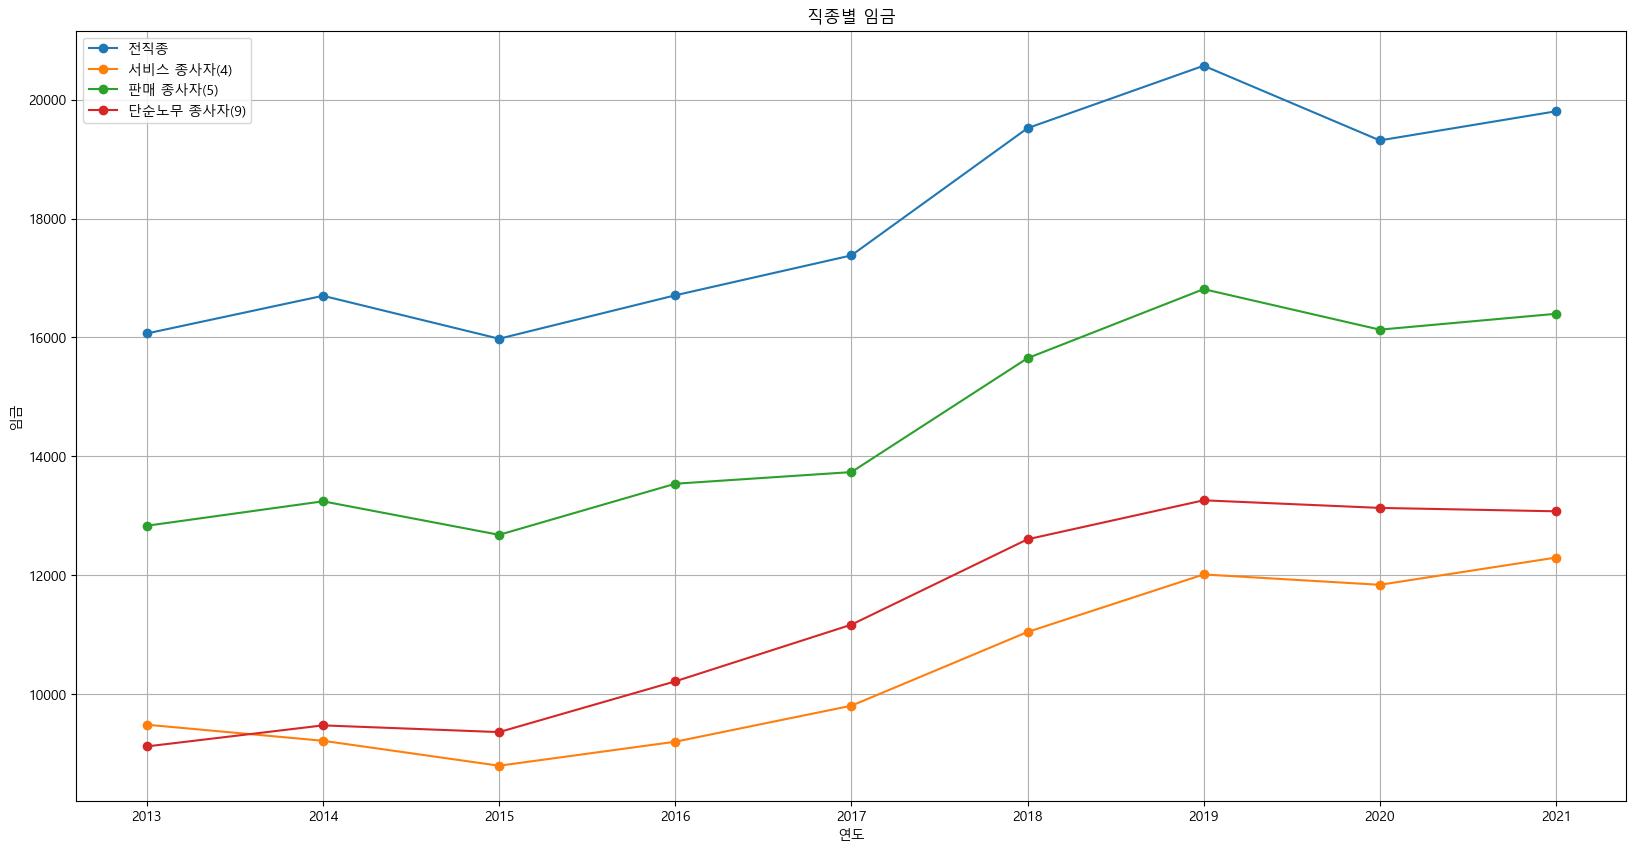

In [21]:
data_pay.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)
plt.xlabel('연도')
plt.ylabel('임금')
plt.title('직종별 임금')

plt.show()

In [22]:

from turtle import width


def MakeBar(data_time_1, rotation, title, ylim = 8000, stacked=False, yticks_interval = 1000):
    plt.figure()
    data_time_1.plot(kind='bar',rot = rotation, title = title, legend =True, 
                    stacked = stacked, figsize = (20,10), width =0.7)
    plt.xticks(fontsize = 15)
    plt.legend(loc='best')
    plt.rc('font', family = 'Malgun Gothic', size = 18)
    plt.title("직종별 임금",fontsize = 20,loc='center', pad=30, fontweight="bold")

    print('data_time_1')
    print(data_time_1)
    
    
    if stacked == False :
        maxlim = (int(max(data_time_1.max())/ yticks_interval)+1) * yticks_interval
        print('maxlim : ',maxlim)
        values = np.arange(130, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values], fontsize = 15) 
    else :
        maxlim = (int(max(data_time_1.sum(axis=1))/ yticks_interval)+1) * yticks_interval
        print('maxlim : ',maxlim)
        values = np.arange(130, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values], fontsize = 15) 
    if ylim != None :
        plt.ylim(ylim)
        

data_time_1
     전직종 서비스 종사자(4) 판매 종사자(5) 단순노무 종사자(9)
0  16067       9482     12831        9117
1  16701       9212     13242        9471
2  15978       8792     12678        9358
3  16709       9196     13538       10212
4  17381       9802     13734       11166
5  19522      11043     15651       12603
6  20573      12011     16813       13259
7  19316      11837     16131       13131
8  19806      12295     16398       13074
maxlim :  21000


<Figure size 640x480 with 0 Axes>

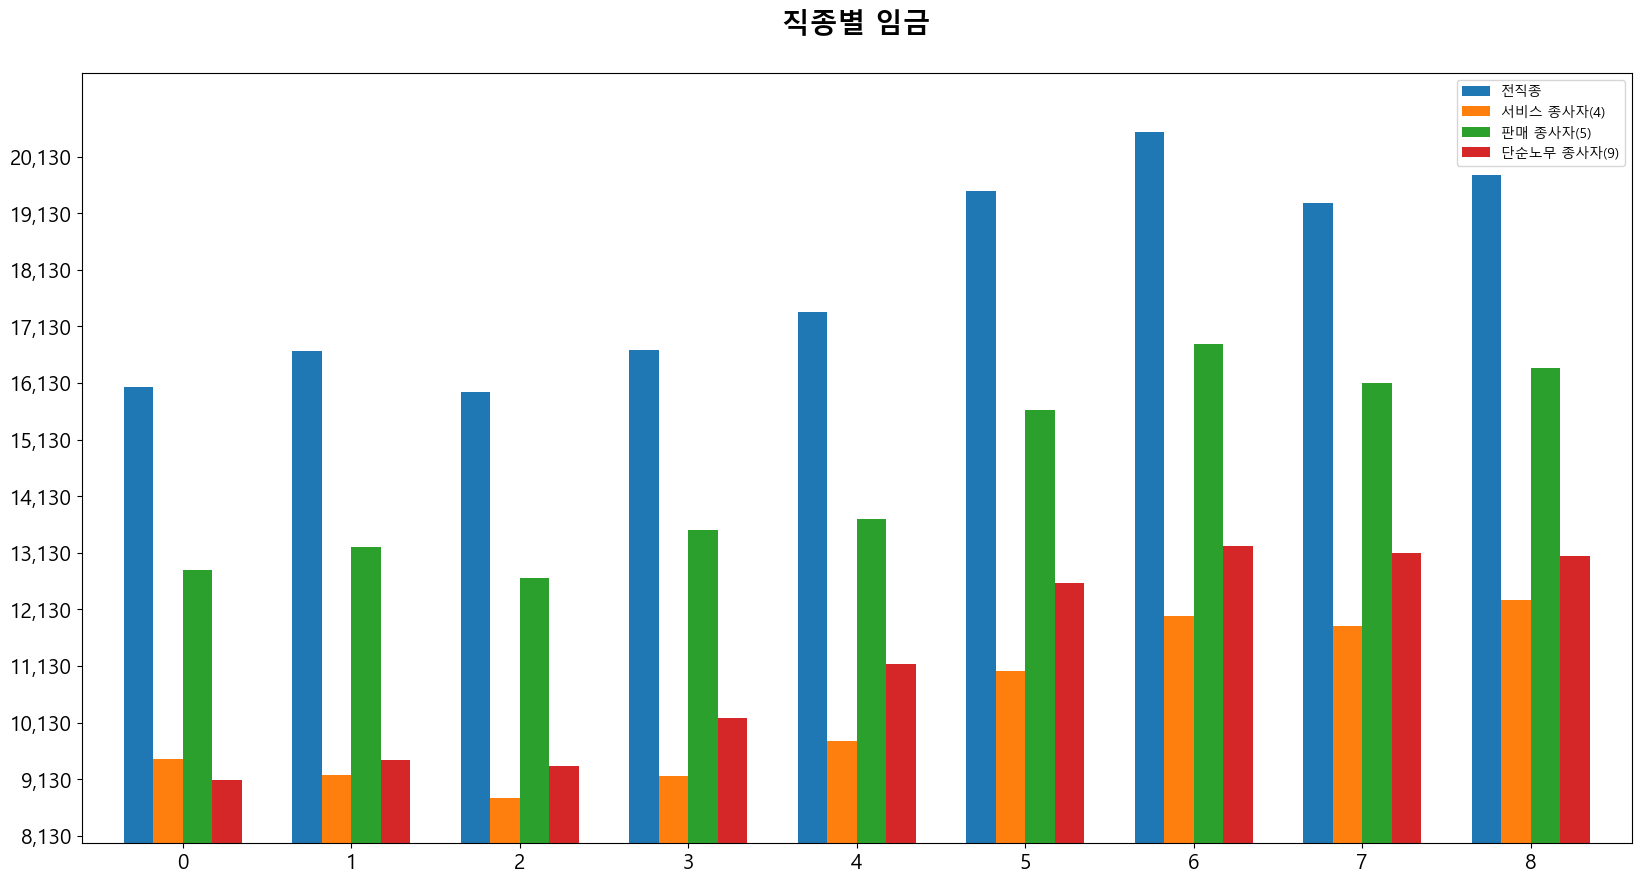

In [23]:
MakeBar(data_time_1 = data_pay_1, rotation = 0, title ="직종별 임금")



plt.show()